In [1]:
%reload_kedro

c:\users\enrmeao\pycharmprojects\coursing\venv\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


2021-01-02 23:15:54,528 - root - INFO - ** Kedro project coursing-ml
2021-01-02 23:15:54,536 - root - INFO - Defined global variable `context` and `catalog`


In [2]:
df = catalog.load("preprocessed_udacity")
df.head(30)

2021-01-02 23:15:55,854 - kedro.io.data_catalog - INFO - Loading data from `preprocessed_udacity` (CSVDataSet)...


,collaboration,description,difficulty,duration,free,id_course,n_reviews,rating,school,skills,title,url,time_range
0,Insight,"Learn to design data models, build data wareho...",intermediate,200.0,0,nd027,918,91.089325,School of Data Science,"Data Modeling, Data Pipelines, Data Lakes, Spa...",Become a Data Engineer,https://www.udacity.com/course/data-engineer-n...,months
1,"Google, Hootsuite, HubSpot, MailChimp, Moz, Fa...","Learn to create marketing content, use social ...",beginner,120.0,0,nd018,1753,93.964632,School of Business,"Digital Marketing, Social Media Marketing, Fac...",Become a Digital Marketer,https://www.udacity.com/course/digital-marketi...,months
2,NaN,You’ll learn how to create a digital user expe...,beginner,120.0,0,nd578,619,94.248788,School of Business,"User Research, User Experience, Prototyping, I...",Become a UX Designer,https://www.udacity.com/course/ux-designer-nan...,months
3,"AWS, Facebook Artificial Intelligence","Become an expert in neural networks, and learn...",intermediate,160.0,0,nd101,2893,93.218113,School of Artificial Intelligence,"Deep Learning, Neural Networks, Jupyter Notebo...",Deep Learning,https://www.udacity.com/course/deep-learning-n...,months
4,NaN,The goal of the Full Stack Web Developer Nanod...,intermediate,160.0,0,nd0044,517,90.870406,School of Programming & Development,"Python, JavaScript, PostgreSQL, Flask, Docker,...",Full Stack Web Developer,https://www.udacity.com/course/full-stack-web-...,months
5,NaN,"Learn the basics of programming through HTML, ...",beginner,160.0,0,nd000,3045,93.642036,School of Programming & Development,"Introduction to Programming, HTML, CSS, Python",Learn to Code,https://www.udacity.com/course/intro-to-progra...,months
6,NaN,Get hands-on experience by coding five real-wo...,intermediate,160.0,0,nd213,680,90.794118,School of Autonomous Systems,"Data Structures & Algorithms, Memory Managemen...",Become a C++ Developer,https://www.udacity.com/course/c-plus-plus-nan...,months
7,"Bertelsmann, Figure Eight, IBM Watson, Insight...",You’ll master the skills necessary to become a...,advanced,80.0,0,nd025,739,93.423545,School of Data Science,"Machine Learning, Deep Learning, Software Engi...",Become a Data Scientist,https://www.udacity.com/course/data-scientist-...,months
8,"Tableau, Mode","In this program, you’ll learn foundational dat...",beginner,120.0,0,nd098,1161,95.021533,School of Business,"Excel & Spreadsheets, SQL, Data Visualization,...",Business Analytics,https://www.udacity.com/course/business-analyt...,months
9,"Kaggle, AWS",Learn advanced machine learning techniques and...,intermediate,120.0,0,nd009t,761,91.537451,School of Artificial Intelligence,"Machine Learning, Supervised Learning, Unsuper...",Become a Machine Learning Engineer,https://www.udacity.com/course/machine-learnin...,months


## Valores nulos

In [3]:
df.isna().sum()

c:\users\enrmeao\pycharmprojects\coursing\venv\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


collaboration    111
description       11
difficulty         6
duration           5
free               0
id_course          0
n_reviews          0
rating           200
school             0
skills            16
title              0
url                0
time_range         0
dtype: int64

## Valores de time_range

In [34]:
df.time_range.value_counts()

c:\users\enrmeao\pycharmprojects\coursing\venv\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


months    102
weeks      95
week       20
month      15
days        9
day         5
hours       3
hour        1
Name: time_range, dtype: int64

## Funciones de exploración

In [6]:
#import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
plt.style.use('seaborn-colorblind')

# 2018.11.07 Created by Eamon.Zhang


def get_dtypes(data,drop_col=[]):
    """Return the dtypes for each column of a pandas Dataframe
    Parameters
    ----------
    data : pandas Dataframe
    drop_col : columns to omit in a list
    Returns
    -------
    str_var_list, num_var_list, all_var_list
    
    """

    name_of_col = list(data.columns)
    num_var_list = []
    str_var_list = []
    all_var_list = []

    str_var_list = name_of_col.copy()
    for var in name_of_col:
        # check if column belongs to numeric type
        if (data[var].dtypes in (np.int, np.int64, np.uint, np.int32, np.float,
                               np.float64, np.float32, np.double)):
            str_var_list.remove(var)
            num_var_list.append(var)
    # drop the omit column from list
    for var in drop_col:
        if var in str_var_list:
            str_var_list.remove(var)
        if var in num_var_list:
            num_var_list.remove(var)

    all_var_list.extend(str_var_list)
    all_var_list.extend(num_var_list)
    return str_var_list, num_var_list, all_var_list


def describe(data,output_path=None):
    """output the general description of a  pandas Dataframe
       into a csv file
    
    """
    
    result = data.describe(include='all')
    if output_path is not None:
        output = os.path.join(output_path,'describe.csv')
        result.to_csv(output)
        print('result saved at:', str(output))
    return result
    
    
def discrete_var_barplot(x,y,data,output_path=None):
    """draw the barplot of a discrete variable x against y(target variable). 
    By default the bar shows the mean value of y.
    Parameters
    ----------
    Returns
    -------
    figure save as PNG
    """
    
    plt.figure(figsize=(15,10))
    sns.barplot(x=x,y=y,data=data)
    if output_path is not None:
        output = os.path.join(output_path,'Barplot_'+str(x)+'_'+str(y)+'.png')
        plt.savefig(output)   
        print('Image saved at', str(output))
    
    
def discrete_var_countplot(x,data,output_path=None):
    """draw the countplot of a discrete variable x.
    Parameters
    ----------
    Returns
    -------
    figure save as PNG
    """    
    
    plt.figure(figsize=(15,10))
    sns.countplot(x=x,data=data)
    if output_path is not None:
        output = os.path.join(output_path,'Countplot_'+str(x)+'.png')
        plt.savefig(output) 
        print('Image saved at',str(output))


def discrete_var_boxplot(x,y,data,output_path=None):
    """draw the boxplot of a discrete variable x against y.
    Parameters
    ----------
    Returns
    -------
    figure save as PNG
    """    
        
    plt.figure(figsize=(15,10))
    sns.boxplot(x=x,y=y,data=data)
    if output_path is not None:
        output = os.path.join(output_path,'Boxplot_'+str(x)+'_'+str(y)+'.png')
        plt.savefig(output) 
        print('Image saved at',str(output))


def continuous_var_distplot(x,output_path=None,bins=None):
    """draw the distplot of a continuous variable x.
    Parameters
    ----------
    Returns
    -------
    figure save as PNG
    """    
    
    plt.figure(figsize=(15,10))
    sns.distplot(a=x,kde=False,bins=bins)
    if output_path is not None:
        output=os.path.join(output_path,'Distplot_'+str(x.name)+'.png')
        plt.savefig(output)
        print('Image saved at',str(output))    
    
    
# 2018.11.28 Created by Eamon.Zhang 

def scatter_plot(x,y,data,output_path=None):
    """draw the scatter-plot of two variables.
    Parameters
    ----------
    Returns
    -------
    figure save as PNG
    """    
    
    plt.figure(figsize=(15,10))
    sns.scatterplot(x=x,y=y,data=data)
    if output_path is not None:
        output = os.path.join(output_path,'Scatter_plot_'+str(x.name)+'_'+str(y.name)+'.png')
        plt.savefig(output)
        print('Image saved at',str(output))       
        
    
def correlation_plot(data,output_path=None):
    """draw the correlation plot between variables.
    Parameters
    ----------
    Returns
    -------
    figure save as PNG
    """    
    
    corrmat = data.corr()
    fig, ax = plt.subplots()
    fig.set_size_inches(11,11)
    sns.heatmap(corrmat,cmap="YlGnBu",linewidths=.5,annot=True)
    if output_path is not None:
        output = os.path.join(output_path,'Corr_plot'+'.png')
        plt.savefig(output)
        print('Image saved at',str(output))  
    
    
def heatmap(data,output_path=None,fmt='d'):
    """draw the heatmap between 2 variables.
    Parameters
    ----------
    Returns
    -------
    figure save as PNG
    """    
    
    fig, ax = plt.subplots()
    fig.set_size_inches(11,11)
    sns.heatmap(data,cmap="YlGnBu",linewidths=.5,annot=True,fmt=fmt)
    if output_path is not None:
        output = os.path.join(output_path,'Heatmap'+'.png')
        plt.savefig(output)
        print('Image saved at',str(output)) 

## dtype de cada columna

In [8]:
str_var_list, num_var_list, all_var_list = get_dtypes(data=df)

In [9]:
print(str_var_list) # string type
print(num_var_list) # numeric type
print(all_var_list) # all

['collaboration', 'description', 'difficulty', 'id_course', 'school', 'skills', 'title', 'url', 'time_range']
['duration', 'free', 'n_reviews', 'rating']
['collaboration', 'description', 'difficulty', 'id_course', 'school', 'skills', 'title', 'url', 'time_range', 'duration', 'free', 'n_reviews', 'rating']


## Análisis estadístico descriptivo

In [10]:
df.describe(include='all')

,collaboration,description,difficulty,duration,free,id_course,n_reviews,rating,school,skills,title,url,time_range
count,139,239,244,245.000000,250.000000,250,250.000000,50.000000,250,234,250,250,250
unique,48,237,3,NaN,NaN,250,NaN,NaN,7,228,250,250,8
top,Google,Learn foundational machine learning algorithms...,intermediate,NaN,NaN,cs262,NaN,NaN,School of Programming & Development,Android Development,Segmentation and Clustering,https://www.udacity.com/course/self-driving-ca...,months
freq,41,2,141,NaN,NaN,1,NaN,NaN,139,5,1,1,102
mean,NaN,NaN,NaN,75.146939,0.752000,NaN,133.600000,92.144993,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,58.480441,0.432718,NaN,434.412561,2.753337,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,1.000000,0.000000,NaN,0.000000,83.333333,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,30.000000,1.000000,NaN,0.000000,91.123597,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,60.000000,1.000000,NaN,0.000000,92.900527,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,120.000000,1.000000,NaN,0.000000,93.863877,NaN,NaN,NaN,NaN,NaN


## Univariate Analysis

c:\users\enrmeao\pycharmprojects\coursing\venv\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


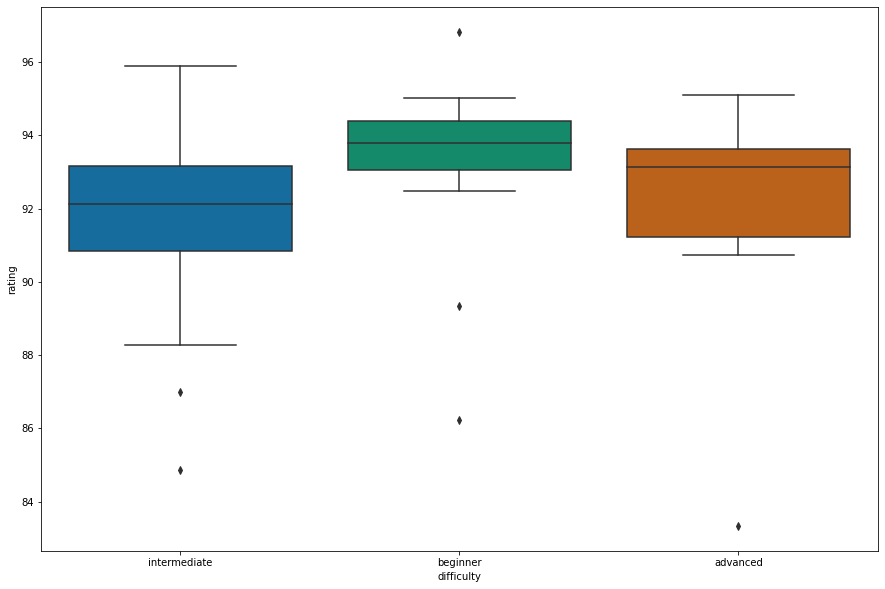

In [15]:
discrete_var_boxplot(x='difficulty',y='rating',data=df)

c:\users\enrmeao\pycharmprojects\coursing\venv\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


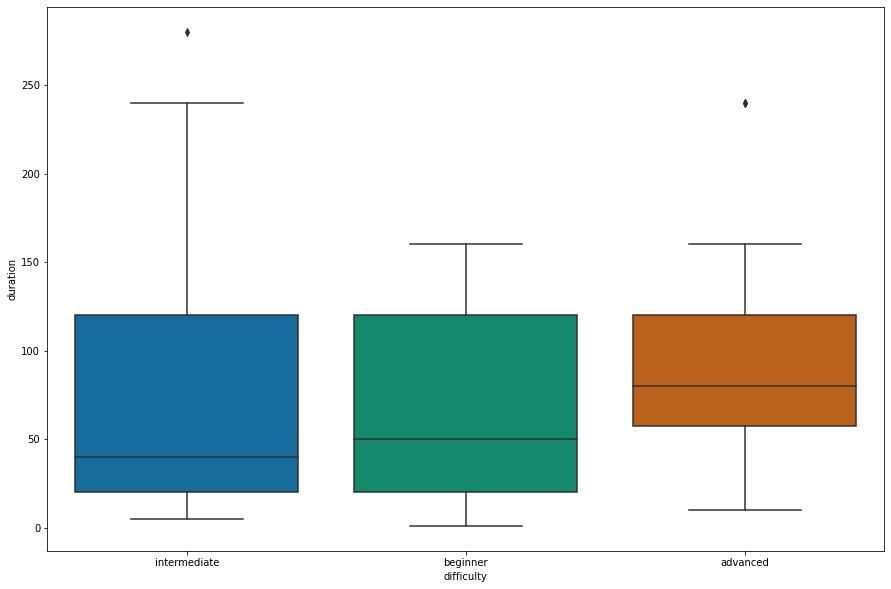

In [14]:
discrete_var_boxplot(x='difficulty',y='duration',data=df)

c:\users\enrmeao\pycharmprojects\coursing\venv\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


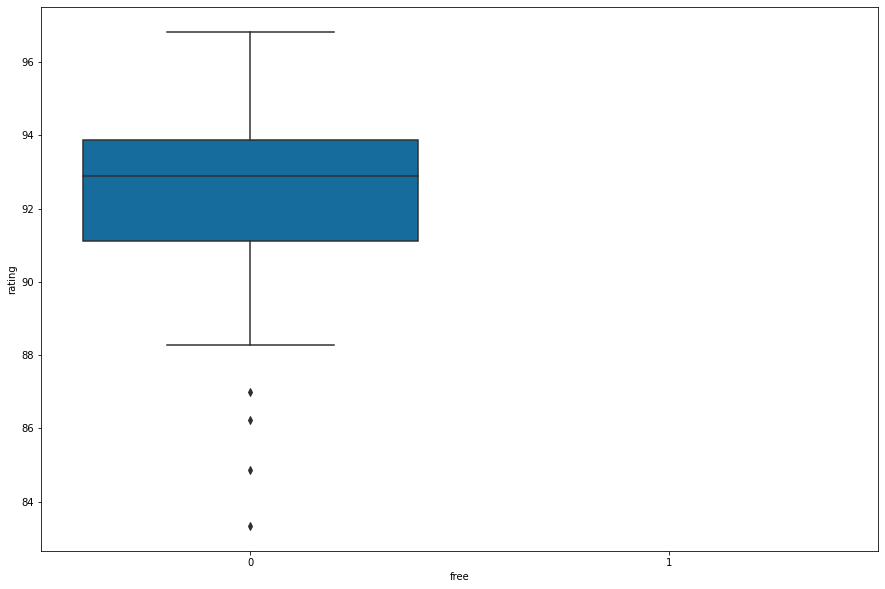

In [18]:
discrete_var_boxplot(x='free',y='rating',data=df)

c:\users\enrmeao\pycharmprojects\coursing\venv\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
c:\users\enrmeao\pycharmprojects\coursing\venv\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


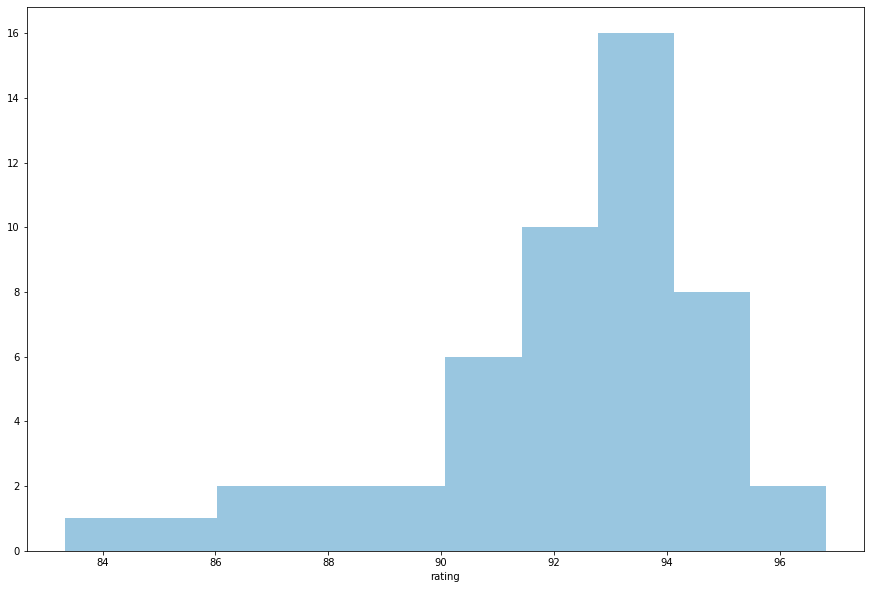

In [19]:
continuous_var_distplot(x=df['rating'])

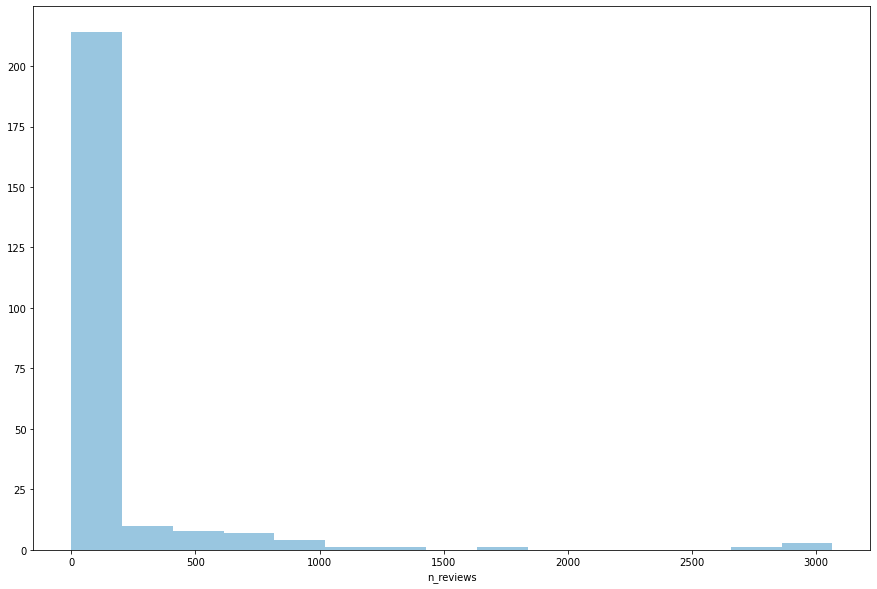

In [21]:
continuous_var_distplot(x=df['n_reviews'])

## Bi-variate analysis

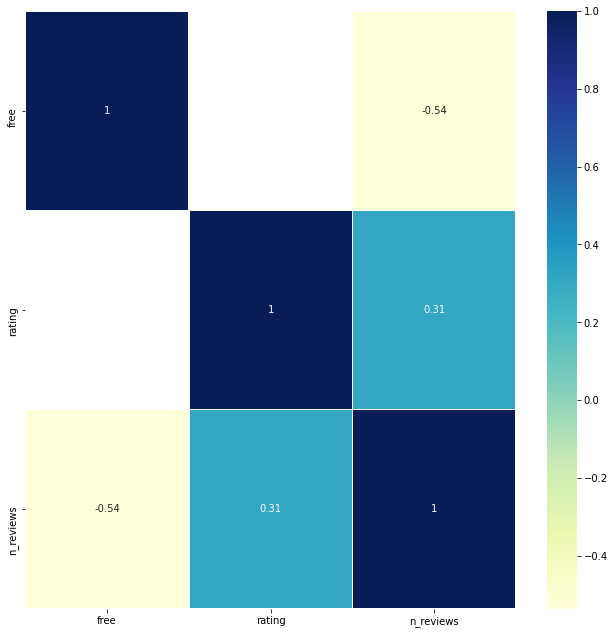

In [31]:
correlation_plot(df[["free", "rating", "n_reviews"]])

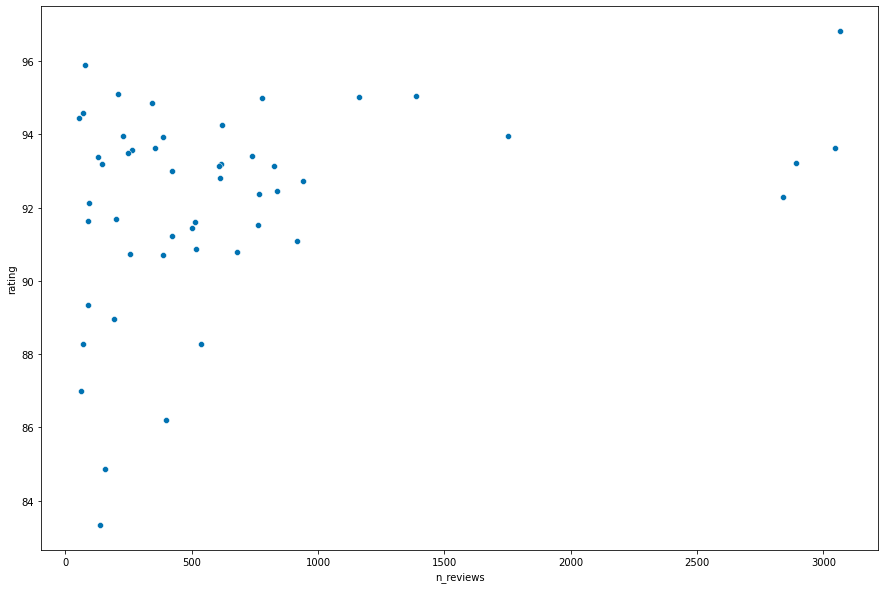

In [33]:
scatter_plot(x=df.n_reviews,y=df.rating,data=df)